# Finding the slopes of the boundaries separated by regional patterns in N, P position graphs

### We have a plot of Black and White coloured points representing the N and P positions corresponding to the particular parameter in various Subtraction games. What is observed is that these points form patterns based on their texture which are separated by boundary lines. Our goal is to detect these lines and study their properties (for e.g. slope)

## Load libraries

In [ ]:
import matplotlib.pyplot as plt
from skimage import io
import math, os
import numpy as np
from PIL import Image
from skimage.filters import threshold_otsu
import cv2 as cv
from scipy import ndimage
from skimage.filters.rank import entropy
from skimage.morphology import disk

### Converts CV Image to PIL format for easy viewing

In [ ]:
def ch2pil(image):
    color_coverted = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    pil_image = Image.fromarray(color_coverted)
    pil_image.show()

### Variance Filter: Highlights edges in the image by replacing each pixel with the neighborhood variance.

### Parameters:
### n : no. of times the variance filter is applied (usually 1, but can go upto 2 or 3 depending on the complexity of the pattern and the no. of regions)
### l : size of the variance filter


In [ ]:
def var(img, n, l):
    for i in range(n):
        img_mean = ndimage.uniform_filter(img, (l, l))
        img_sqr_mean = ndimage.uniform_filter(img**2, (l, l))
        img_var = img_sqr_mean - img_mean**2
        img = img_var
    plt.imshow(img, cmap='gray')
    ch2pil(img)
    return img

### Entropy filter: Entropy is a statistical measure of randomness that can be used to characterize the texture of the input image. This filter can segment portions of an image by their complexity.

### Parameters:
### k : no. of times entropy filter is applied (usually 1 or 2)

In [ ]:
def entro(img_var, k):
    for i in range(k):
        entropy_img = entropy(img_var, disk(5))
        entropy_img = entropy_img.astype('uint8') * 255
        img_var = entropy_img
    plt.imshow(img_var)
    ch2pil(img_var)
    return img_var

### Houghline Detection: A popular technique for detecting straight lines and curves on gray- scale images. It maps image data from image space to a parameter space, where curve detection becomes peak detection problem.

In [ ]:
def houglines(entropy_img):
    image = entropy_img

    edge_image = cv.GaussianBlur(image, (3, 3), 1)
    edge_image = cv.Canny(edge_image, 100, 200)
    edge_image = cv.dilate(
            edge_image,
            cv.getStructuringElement(cv.MORPH_RECT, (5, 5)),
            iterations=1
        )
    edge_image = cv.erode(
            edge_image,
            cv.getStructuringElement(cv.MORPH_RECT, (5, 5)),
            iterations=1
        )
    edges = cv.Canny(edge_image, 50, 150, apertureSize=3)
    lines = cv.HoughLines(edges, 1, np.pi/180, 200)

    slopes = []

    for r_theta in lines:
        arr = np.array(r_theta[0], dtype=np.float64)
        r, theta = arr
        # Stores the value of cos(theta) in a
        a = np.cos(theta)

        # Stores the value of sin(theta) in b
        b = np.sin(theta)

        # x0 stores the value rcos(theta)
        x0 = a*r

        # y0 stores the value rsin(theta)
        y0 = b*r

        # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
        x1 = int(x0 + 1000*(-b))

        # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
        y1 = int(y0 + 1000*(a))

        # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
        x2 = int(x0 - 1000*(-b))

        # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
        y2 = int(y0 - 1000*(a))

        if x1 != x2:
            slope = abs((y2 - y1)/(x2 - x1))
            if slope > 0.05 and slope < 15:
                slopes.append(slope)
#             elif slope > 15:
#                 slopes.append('')
#             else:
#                 slopes.append(slope)
#         else:
#             slopes.append('')

        # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
        # (0,0,255) denotes the colour of the line to be
        # drawn. In this case, it is red.
        cv.line(edge_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    ch2pil(edge_image)
    plt.imshow(edge_image)
    return slopes

### Load an image

In [ ]:
image = cv.imread('./166122.png', 0)
ch2pil(image)

### Set parameters

In [ ]:
n = 1
l = 5
k = 1

### Operate the functions and see the outputs:

True

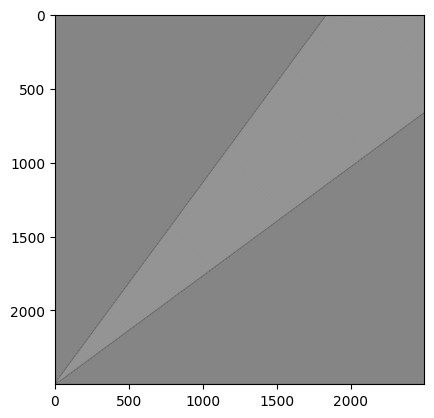

In [ ]:
image2 = var(image, n, l)
cv.imwrite('h2.png', image2)

True

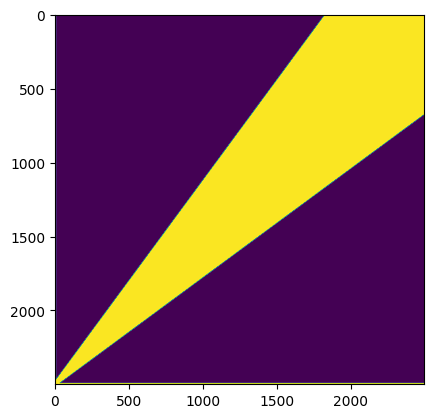

In [ ]:
image3 = entro(image2, k)
cv.imwrite('h3.png', image3)

[1.3758503401360545,
 1.3770212765957446,
 1.3770212765957446,
 1.376700680272109,
 1.3770212765957446,
 0.7268232385661311,
 0.7262051915945612,
 0.7262051915945612,
 0.7262051915945612,
 0.7268232385661311,
 0.7262051915945612,
 1.3758503401360545,
 0.7268232385661311]

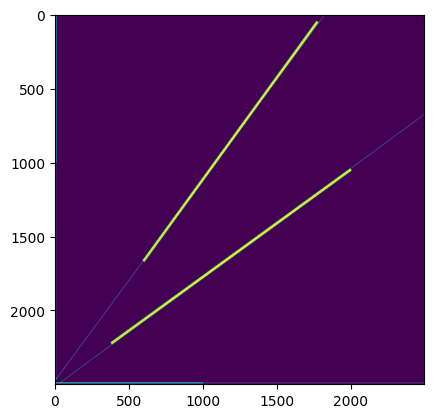

In [ ]:
houglines(image3)

In [ ]:
cv.imwrite('h1.png', image3)

True

In [ ]:
# #Variance - not a great way to quantify texture
# k=7
# img_mean = ndimage.uniform_filter(img, (k, k))
# img_sqr_mean = ndimage.uniform_filter(img**2, (k, k))
# img_var = img_sqr_mean - img_mean**2
# plt.imshow(img_var, cmap='gray')
# ch2pil(img_var)

In [ ]:
# k=7
# img = img_var
# img_mean = ndimage.uniform_filter(img, (k, k))
# img_sqr_mean = ndimage.uniform_filter(img**2, (k, k))
# img_var = img_sqr_mean - img_mean**2
# plt.imshow(img_var, cmap='gray')
# ch2pil(img_var)

In [ ]:
# #Entropy
# #Entropy quantifies disorder.
# #Since cell region has high variation in pixel values the entropy would be
# #higher compared to scratch region

# entropy_img = entropy(img_var, disk(5))
# entropy_img = entropy_img.astype('uint8') * 255
# #entropy_img = np.asarray(entropy_img, dtype='float32')

# #Image.fromarray((entropy_img * 1).astype(np.uint8)).convert('RGB')

# plt.imshow(entropy_img)
# ch2pil(entropy_img)

# # cv.imshow("", entropy_img)
# # cv.waitKey(0)
# # cv.destroyAllWindows()

# # color_coverted = cv.cvtColor(entropy_img, cv.COLOR_BGR2RGB)
# # pil_image = Image.fromarray(color_coverted)
# # pil_image.show()

In [ ]:
# from skimage.filters.rank import entropy
# from skimage.morphology import disk

# img_var = entropy_img
# entropy_img = entropy(img_var, disk(5))
# entropy_img = entropy_img.astype('uint8') * 255
# #entropy_img = np.asarray(entropy_img, dtype='float32')

# #Image.fromarray((entropy_img * 1).astype(np.uint8)).convert('RGB')

# plt.imshow(entropy_img)

# # cv.imshow("", entropy_img)
# # cv.waitKey(0)
# # cv.destroyAllWindows()

In [ ]:
# # binary = np.asarray(binary, dtype="uint8")

# # image = cv.imread('./imag.jpg')

# dst = cv.Canny(entropy_img, 50, 200, None, 3)

# cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
# cdstP = np.copy(cdst)

# lines = cv.HoughLines(dst, 1, np.pi / 180, 0, None, 0, 0)

# slopes = []

# if lines is not None:
#         for i in range(0, len(lines)):
#             rho = lines[i][0][0]
#             theta = lines[i][0][1]
#             a = math.cos(theta)
#             b = math.sin(theta)
#             x0 = a * rho
#             y0 = b * rho
#             pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
#             pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
#             cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)

#             if pt1[0] != pt2[0]:
#                 slope = abs((pt2[1] - pt1[1])/(pt2[0] - pt1[0]))
#                 slopes.append(slope)
#             else:
#                 slopes.append("infinity")


# linesP = cv.HoughLinesP(dst, 1, np.pi / 180, None, None, 50, 10)

# if linesP is not None:
#         for i in range(0, len(linesP)):
#             l = linesP[i][0]
#             cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

# ch2pil(cdstP)
# plt.imshow(cdstP)
# print(slopes)

In [ ]:
# image = entropy_img
# #edge_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# edge_image = cv.GaussianBlur(image, (3, 3), 1)
# edge_image = cv.Canny(edge_image, 100, 200)
# edge_image = cv.dilate(
#         edge_image,
#         cv.getStructuringElement(cv.MORPH_RECT, (5, 5)),
#         iterations=1
#     )
# edge_image = cv.erode(
#         edge_image,
#         cv.getStructuringElement(cv.MORPH_RECT, (5, 5)),
#         iterations=1
#     )

# plt.imshow(edge_image)
# ch2pil(edge_image)
# # Convert the img to grayscale
# #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # Apply edge detection method on the image
# edges = cv.Canny(edge_image, 50, 150, apertureSize=3)

# # This returns an array of r and theta values
# lines = cv.HoughLines(edges, 1, np.pi/180, 200)

# slopes = []

# # The below for loop runs till r and theta values
# # are in the range of the 2d array
# for r_theta in lines:
#     arr = np.array(r_theta[0], dtype=np.float64)
#     r, theta = arr
#     # Stores the value of cos(theta) in a
#     a = np.cos(theta)

#     # Stores the value of sin(theta) in b
#     b = np.sin(theta)

#     # x0 stores the value rcos(theta)
#     x0 = a*r

#     # y0 stores the value rsin(theta)
#     y0 = b*r

#     # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
#     x1 = int(x0 + 1000*(-b))

#     # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
#     y1 = int(y0 + 1000*(a))

#     # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
#     x2 = int(x0 - 1000*(-b))

#     # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
#     y2 = int(y0 - 1000*(a))

#     if x1 != x2:
#         slope = abs((y2 - y1)/(x2 - x1))
#         slopes.append(slope)
#     else:
#         slopes.append("infinity")

#     # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
#     # (0,0,255) denotes the colour of the line to be
#     # drawn. In this case, it is red.
#     cv.line(edge_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# # All the changes made in the input image are finally
# # written on a new image houghlines.jpg
# ch2pil(edge_image)
# plt.imshow(edge_image)
# print(slopes)